In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Qingshui = df['SiteName'].isin(['清水']) #找清水測站
df[Qingshui]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460345,461640,清水,臺中市,32.0,懸浮微粒,良好,1.6,NaN,NaN,16,...,35.0,8.0,10.0,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460434,461729,清水,臺中市,30.0,懸浮微粒,良好,1.8,NaN,NaN,15,...,32.0,7.0,10.9,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460447,461742,清水,臺中市,28.0,懸浮微粒,良好,2.1,NaN,NaN,15,...,30.0,7.0,9.0,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460536,461831,清水,臺中市,29.0,懸浮微粒,良好,1.6,NaN,NaN,15,...,31.0,6.0,9.6,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460673,461968,清水,臺中市,28.0,懸浮微粒,良好,2.0,NaN,NaN,16,...,30.0,6.0,11.7,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460790,462085,清水,臺中市,28.0,懸浮微粒,良好,2.1,NaN,NaN,17,...,30.0,7.0,9.0,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460879,462174,清水,臺中市,30.0,懸浮微粒,良好,2.5,NaN,NaN,19,...,32.0,7.0,10.6,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461196,462491,清水,臺中市,42.0,懸浮微粒,良好,2.1,NaN,NaN,25,...,45.0,9.0,11.2,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461285,462580,清水,臺中市,47.0,懸浮微粒,良好,2.3,NaN,NaN,27,...,51.0,9.0,11.4,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461374,462669,清水,臺中市,51.0,懸浮微粒,普通,1.8,NaN,NaN,28,...,56.0,9.0,11.8,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Qingshui = df['SiteName'].isin(['清水']) #找清水測站
Qingshui=df[Qingshui].fillna(method='ffill').drop(columns=['CO','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Qingshui

,SO2,O3,PM10,PM25,NO2
0,1.6,16,35.0,8.0,10.0
1,1.8,15,32.0,7.0,10.9
2,2.1,15,30.0,7.0,9.0
3,1.6,15,31.0,6.0,9.6
4,2.0,16,30.0,6.0,11.7
5,2.1,17,30.0,7.0,9.0
6,2.5,19,32.0,7.0,10.6
7,2.1,25,45.0,9.0,11.2
8,2.3,27,51.0,9.0,11.4
9,1.8,28,56.0,9.0,11.8


In [5]:
bbb=Qingshui['PM10']>50
#Qingshui['PM10']=Qingshui['PM10'].astype("int")
#Qingshui['PM10']=Qingshui['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Qingshui['PM10'].replace(2,np.nan, inplace=True)


In [6]:
Qingshui.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Qingshui

,SO2,O3,PM10,PM25,NO2
0,1.6,16,35.0,8.0,10.0
1,1.8,15,32.0,7.0,10.9
2,2.1,15,30.0,7.0,9.0
3,1.6,15,31.0,6.0,9.6
4,2.0,16,30.0,6.0,11.7
5,2.1,17,30.0,7.0,9.0
6,2.5,19,32.0,7.0,10.6
7,2.1,25,45.0,9.0,11.2
8,2.3,27,51.0,9.0,11.4
9,1.8,28,56.0,9.0,11.8


In [7]:
aaa=Qingshui['PM10']>200
Qingshui[aaa]

,SO2,O3,PM10,PM25,NO2
1710,2.0,21,208.0,135.0,21.1
1711,2.0,20,212.0,139.0,23.0
1712,2.1,20,206.0,136.0,24.2
1713,2.2,21,202.0,131.0,20.8
3361,2.2,20,204.0,101.0,16.4
3362,2.1,20,206.0,100.0,12.6


In [8]:
Qingshui.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Qingshui

,SO2,O3,PM10,PM25,NO2
0,1.6,16,35.0,8.0,10.0
1,1.8,15,32.0,7.0,10.9
2,2.1,15,30.0,7.0,9.0
3,1.6,15,31.0,6.0,9.6
4,2.0,16,30.0,6.0,11.7
5,2.1,17,30.0,7.0,9.0
6,2.5,19,32.0,7.0,10.6
7,2.1,25,45.0,9.0,11.2
8,2.3,27,51.0,9.0,11.4
9,1.8,28,56.0,9.0,11.8


In [9]:
Qingshui['pr']=''
#Qingshui.drop([ 0,1],inplace=True)
#Qingshui.reset_index(drop=True,inplace=True)
#000

Qingshui.to_csv('Qingshuipollution.csv')

Qingshui

,SO2,O3,PM10,PM25,NO2,pr
0,1.6,16,35.0,8.0,10.0,
1,1.8,15,32.0,7.0,10.9,
2,2.1,15,30.0,7.0,9.0,
3,1.6,15,31.0,6.0,9.6,
4,2.0,16,30.0,6.0,11.7,
5,2.1,17,30.0,7.0,9.0,
6,2.5,19,32.0,7.0,10.6,
7,2.1,25,45.0,9.0,11.2,
8,2.3,27,51.0,9.0,11.4,
9,1.8,28,56.0,9.0,11.8,


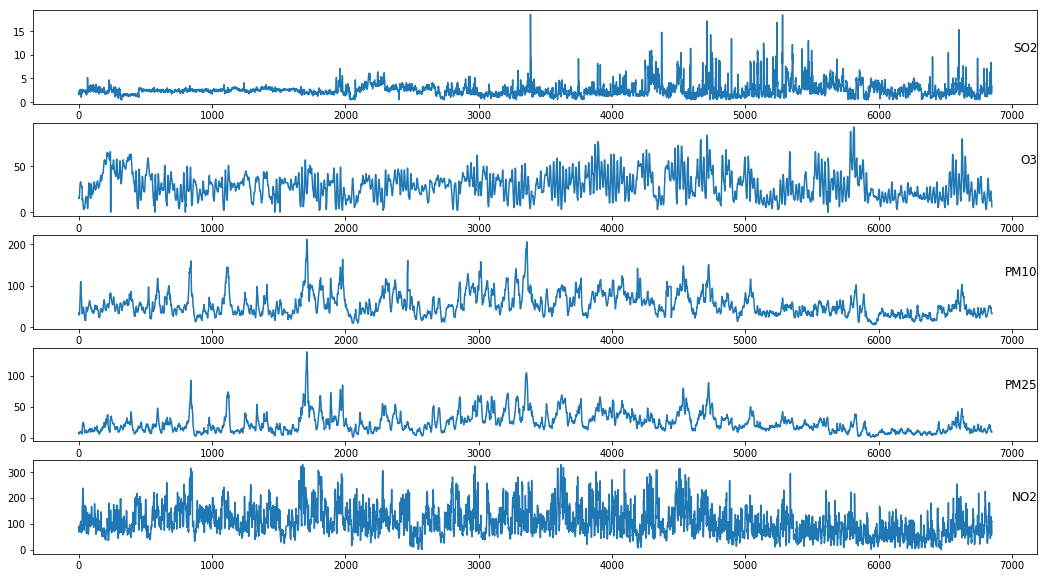

In [10]:
# load dataset
dataset =pd.read_csv('Qingshuipollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,O3,PM10,PM25,NO2,pr
0,-0.688166,-0.916624,-0.713845,-1.013799,-0.532296,8.0
1,-0.549740,-0.986585,-0.821306,-1.076585,-0.403814,7.0
2,-0.342103,-0.986585,-0.892947,-1.076585,-0.675054,7.0
3,-0.688166,-0.986585,-0.857127,-1.139371,-0.589400,6.0
4,-0.411315,-0.916624,-0.892947,-1.139371,-0.289608,6.0
5,-0.342103,-0.846663,-0.892947,-1.076585,-0.675054,7.0
6,-0.065252,-0.706740,-0.821306,-1.076585,-0.446642,7.0
7,-0.342103,-0.286973,-0.355642,-0.951013,-0.360987,9.0
8,-0.203678,-0.147050,-0.140719,-0.951013,-0.332435,9.0
9,-0.549740,-0.077089,0.038382,-0.951013,-0.275332,9.0


In [12]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [13]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
#def shuffle__(X,Y):
  #  np.random.seed(10)
  #  randomList = np.arange(X.shape[0])
   # np.random.shuffle(randomList)
   # return X[randomList], Y[randomList]

In [14]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
from sklearn.utils import shuffle 

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#model
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,24,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(24, 5))`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
__________

5524/5524 [==============================] - 2s 402us/step - loss: 51.9116 - val_loss: 26.5070
Epoch 64/500
5524/5524 [==============================] - 2s 386us/step - loss: 49.4926 - val_loss: 26.4565
Epoch 65/500
5524/5524 [==============================] - 2s 390us/step - loss: 50.3963 - val_loss: 26.2841
Epoch 66/500
5524/5524 [==============================] - 2s 392us/step - loss: 51.4449 - val_loss: 27.5967
Epoch 67/500
5524/5524 [==============================] - 2s 382us/step - loss: 50.3045 - val_loss: 26.9632
Epoch 68/500
5524/5524 [==============================] - 2s 382us/step - loss: 48.8545 - val_loss: 27.0930
Epoch 69/500
5524/5524 [==============================] - 2s 329us/step - loss: 50.2558 - val_loss: 26.8900
Epoch 70/500
5524/5524 [==============================] - 2s 416us/step - loss: 50.5012 - val_loss: 26.0671
Epoch 71/500
5524/5524 [==============================] - 2s 404us/step - loss: 47.6889 - val_loss: 25.7088
Epoch 72/500
5524/5524 [=================

5524/5524 [==============================] - 3s 569us/step - loss: 36.7353 - val_loss: 20.5379
Epoch 139/500
5524/5524 [==============================] - 3s 574us/step - loss: 36.1541 - val_loss: 20.0515
Epoch 140/500
5524/5524 [==============================] - 3s 571us/step - loss: 37.2844 - val_loss: 20.1806
Epoch 141/500
5524/5524 [==============================] - 3s 551us/step - loss: 35.7680 - val_loss: 20.1443
Epoch 142/500
5524/5524 [==============================] - 3s 501us/step - loss: 37.0150 - val_loss: 19.6263
Epoch 143/500
5524/5524 [==============================] - 3s 539us/step - loss: 35.5548 - val_loss: 19.7795
Epoch 144/500
5524/5524 [==============================] - 3s 490us/step - loss: 36.3669 - val_loss: 19.8623
Epoch 145/500
5524/5524 [==============================] - 3s 466us/step - loss: 36.3483 - val_loss: 19.5217
Epoch 146/500
5524/5524 [==============================] - 3s 502us/step - loss: 38.8731 - val_loss: 19.8736
Epoch 147/500
5524/5524 [========

5524/5524 [==============================] - 3s 496us/step - loss: 30.0066 - val_loss: 15.0082
Epoch 214/500
5524/5524 [==============================] - 3s 510us/step - loss: 30.3375 - val_loss: 14.4137
Epoch 215/500
5524/5524 [==============================] - 3s 485us/step - loss: 28.6272 - val_loss: 14.1956
Epoch 216/500
5524/5524 [==============================] - 3s 471us/step - loss: 30.3370 - val_loss: 13.8229
Epoch 217/500
5524/5524 [==============================] - 3s 478us/step - loss: 29.5408 - val_loss: 14.5254
Epoch 218/500
5524/5524 [==============================] - 3s 463us/step - loss: 29.8250 - val_loss: 14.6385
Epoch 219/500
5524/5524 [==============================] - 3s 473us/step - loss: 28.7188 - val_loss: 13.9048
Epoch 220/500
5524/5524 [==============================] - 2s 452us/step - loss: 28.6129 - val_loss: 13.8185
Epoch 221/500
5524/5524 [==============================] - 3s 495us/step - loss: 29.4215 - val_loss: 14.0083
Epoch 222/500
5524/5524 [========

5524/5524 [==============================] - 3s 454us/step - loss: 25.9922 - val_loss: 12.1306
Epoch 289/500
5524/5524 [==============================] - 2s 441us/step - loss: 25.4789 - val_loss: 11.5371
Epoch 290/500
5524/5524 [==============================] - 2s 410us/step - loss: 25.3956 - val_loss: 12.0501
Epoch 291/500
5524/5524 [==============================] - 2s 415us/step - loss: 27.1800 - val_loss: 11.9714
Epoch 292/500
5524/5524 [==============================] - 2s 413us/step - loss: 26.3116 - val_loss: 12.3131
Epoch 293/500
5524/5524 [==============================] - 3s 460us/step - loss: 25.8544 - val_loss: 11.7639
Epoch 294/500
5524/5524 [==============================] - 2s 426us/step - loss: 25.2282 - val_loss: 11.6517
Epoch 295/500
5524/5524 [==============================] - 2s 442us/step - loss: 25.4973 - val_loss: 11.2153
Epoch 296/500
5524/5524 [==============================] - 2s 429us/step - loss: 25.0409 - val_loss: 11.7574
Epoch 297/500
5524/5524 [========

5524/5524 [==============================] - 1s 221us/step - loss: 22.7016 - val_loss: 10.7490
Epoch 364/500
5524/5524 [==============================] - 1s 224us/step - loss: 23.7073 - val_loss: 10.8258
Epoch 365/500
5524/5524 [==============================] - 1s 220us/step - loss: 23.5917 - val_loss: 10.2009
Epoch 366/500
5524/5524 [==============================] - 1s 227us/step - loss: 22.9196 - val_loss: 10.2574
Epoch 367/500
5524/5524 [==============================] - 1s 239us/step - loss: 24.4154 - val_loss: 10.0477
Epoch 368/500
5524/5524 [==============================] - 1s 210us/step - loss: 23.7609 - val_loss: 10.9257
Epoch 369/500
5524/5524 [==============================] - 1s 231us/step - loss: 23.3482 - val_loss: 10.4977
Epoch 370/500
5524/5524 [==============================] - 1s 228us/step - loss: 23.9787 - val_loss: 10.5733
Epoch 371/500
5524/5524 [==============================] - 1s 221us/step - loss: 23.3957 - val_loss: 11.0006
Epoch 372/500
5524/5524 [========

5524/5524 [==============================] - 1s 144us/step - loss: 21.9108 - val_loss: 9.1599
Epoch 439/500
5524/5524 [==============================] - 1s 142us/step - loss: 22.2294 - val_loss: 9.8429
Epoch 440/500
5524/5524 [==============================] - 1s 139us/step - loss: 21.8847 - val_loss: 9.2341
Epoch 441/500
5524/5524 [==============================] - 1s 151us/step - loss: 21.6745 - val_loss: 10.0948
Epoch 442/500
5524/5524 [==============================] - 1s 144us/step - loss: 21.3493 - val_loss: 9.4008
Epoch 443/500
5524/5524 [==============================] - 1s 147us/step - loss: 22.2029 - val_loss: 9.5532
Epoch 444/500
5524/5524 [==============================] - 1s 149us/step - loss: 22.7005 - val_loss: 9.7012
Epoch 445/500
5524/5524 [==============================] - 1s 145us/step - loss: 21.9653 - val_loss: 9.5065
Epoch 446/500
5524/5524 [==============================] - 1s 139us/step - loss: 21.7693 - val_loss: 10.0681
Epoch 447/500
5524/5524 [===============

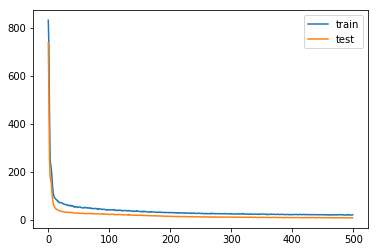

In [18]:
def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel2(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Qingshuimodel.h5')
del model

In [19]:
model = load_model('Qingshuimodel.h5')
model.evaluate(X_val , Y_val)

682/682 [==============================] - 0s 415us/step


9.60782766481998

In [20]:
model.metrics_names

['loss']

In [21]:
Y_val.shape

(682, 7)

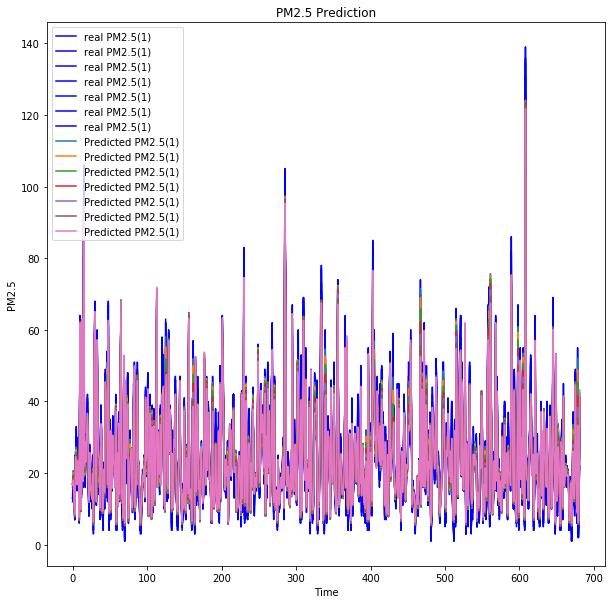

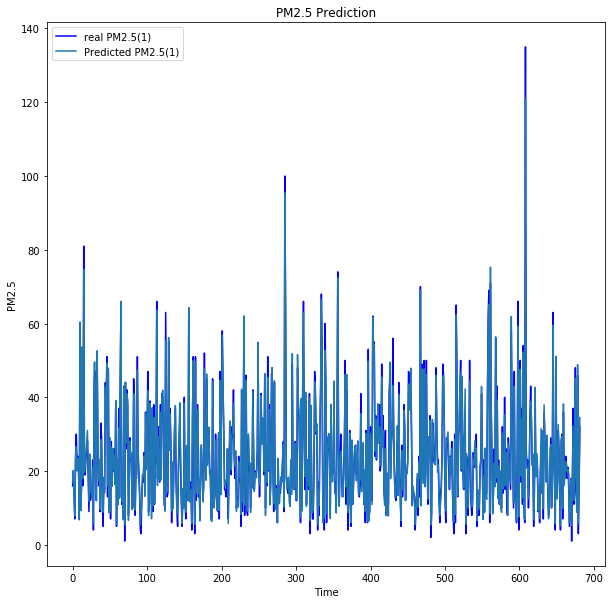

Train 0.6466275659824047
Validation 0.533724340175953
The R2 score on the Test set is:	0.962
Train Score: 2.72 RMSE
Test Score: 3.10 RMSE
The MSE   on the Test set is: 9.607827686970351
The RMSE  on the Test set is: 3.099649607128256
The MAE   on the Test set is: 2.318547886887204
The MAPE  on the Test set is: 0.022084750995372063
The SMAPE on the Test set is: 0.01883714232266698


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [22]:
#讀取model3
model = load_model('Qingshuimodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.figure(figsize=(10,10)) 
plt.plot(Y_val, color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict, label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
plt.figure(figsize=(10,10)) 
plt.plot(Y_val[0:,1], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:,1], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

# print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

